# Edge-IIoT IoT malware multiclass detection using Network Traffic Classification based on Single Flow Time Series Analysis   

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../cnsm_final_datasets/edge_iiot_multiclass.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,224.0.0.251,192.168.1.101,60,0,2940,0,1.640646e+09,1.640646e+09,5353,...,-261597.321119,0.199572,0.208451,0.054236,NaN,-70.042430,297845.871189,-0.000596,0.000037,clear
1,1,192.168.1.128.,192.168.1.101,7,0,46,0,1.640646e+09,1.640646e+09,1883,...,-313387.471075,0.797161,0.867292,NaN,NaN,-249.116969,67780.547523,0.182773,0.000189,clear
2,2,192.168.1.101.,192.168.1.128,6,0,4,0,1.640646e+09,1.640646e+09,61823,...,7094.431505,0.851000,0.785438,0.200317,NaN,4.158316,8.379427,0.884464,0.002473,clear
3,3,192.168.1.128.,192.168.1.101,8,0,46,0,1.640646e+09,1.640646e+09,1883,...,9179.647412,0.864509,0.816404,0.175113,1.055740,5.576106,9.812098,0.885259,0.002474,clear
4,4,192.168.1.101.,192.168.1.128,7,0,4,0,1.640646e+09,1.640646e+09,61824,...,2202.584636,0.745707,0.619200,0.272827,NaN,1.684225,0.290936,0.883868,0.091092,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452657,1452657,192.168.0.128.,192.168.0.170,7,0,102,0,1.638212e+09,1.638212e+09,80,...,268404.310201,0.619156,0.243761,NaN,NaN,6895.394550,3992.122541,-0.000199,0.002736,XSS
1452658,1452658,172.217.19.42.,192.168.0.128,29,0,2588,0,1.638208e+09,1.638208e+09,443,...,1588.889464,0.779480,0.480554,0.308518,-0.226912,3.135308,42.324922,0.176019,0.086074,XSS
1452659,1452659,192.168.0.128.,172.217.19.42,22,0,2118,0,1.638208e+09,1.638208e+09,53024,...,3899.614072,0.217055,0.371308,0.259434,-0.553421,3.704308,31.696439,-0.415412,0.076778,XSS
1452660,1452660,104.16.87.20.,192.168.0.128,21,0,2552,0,1.638212e+09,1.638212e+09,443,...,4690.827782,0.664055,0.585775,0.261460,0.070717,2.625166,1.385119,-0.254293,0.017806,XSS


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        if F in distribution_features:
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in frequency_features: 
            df.replace([np.inf], -1, inplace=True)
            df.replace([-np.inf], -1, inplace=True)
            df.loc[df[F].isnull(), F] = -1
        else:
            df.replace([np.inf], 0, inplace=True)
            df.replace([-np.inf], 0, inplace=True)
            df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,224.0.0.251,192.168.1.101,60,0,2940,0,1.640646e+09,1.640646e+09,5353,5353,109,109.0,0.000000,0,-1.000000,109.0,109.00,109,109,0,109,0.000000,0,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.004354,0.666667,0.500009,0.875000,147.520426,150.018016,75.009759,225.027113,295.035825,5.000607,5.000450,4.916481,5.085931,0.983224,False,0.000000,False,0.0,0.666667,1308,1.0,True,109,5.002997,-98298.111034,2438.475406,0.200168,0.199572,-34.814260,1633.287018,0.00000,-174071.302265,-1.000000,1.457744e+07,-261597.321119,0.199572,0.208451,0.054236,-1.000000,-70.042430,297845.871189,-0.000596,True,clear,3
1,1,192.168.1.128.,192.168.1.101,7,0,46,0,1.640646e+09,1.640646e+09,1883,61823,66,60.0,11.489125,133,-0.703465,60.0,68.00,60,90,30,60,17.407766,8,12.121212,67.421913,0.714286,0.285714,0.522233,12.011358,3.874170,3.767915e-04,4.883776e-04,-0.500000,2.798373,1.664498,0.592906,0.470985,False,0.665736,0.000000,0.000000,0.496637,0.687500,0.010121,0.005157,0.000364,0.020341,0.020379,0.003397,0.000446,0.000038,0.014798,0.229526,False,1.333333,False,0.0,0.000000,466,1.0,False,0,0.000000,-24101.201830,1611.718130,0.797360,0.980133,-6.469724,357.132637,0.21654,-32348.621952,-1.000000,2.083880e+07,-313387.471075,0.797161,0.867292,-1.000000,-1.000000,-249.116969,67780.547523,0.182773,True,clear,3
2,2,192.168.1.101.,192.168.1.128,6,0,4,0,1.640646e+09,1.640646e+09,61823,1883,60,60.0,1.414214,3,-0.953945,60.0,60.00,60,64,4,60,2.357023,0,0.000000,60.684979,0.000000,0.166667,0.000000,84.852814,2591.782055,2.357023e-01,3.227486e-01,0.000000,10.666667,0.650022,0.251463,0.285759,False,0.467697,0.000000,0.000000,0.413082,0.825000,0.008261,0.004891,0.000358,0.019974,0.019999,0.004000,0.000546,0.000025,0.015083,0.265189,False,0.800000,False,0.0,0.000000,364,1.0,False,0,0.000000,-0.215011,4.683203,0.007263,0.891727,1.126226,1.375427,0.17333,5631.128620,-1.000000,1.799377e+04,7094.431505,0.851000,0.785438,0.200317,-1.000000,4.158316,8.379427,0.884464,True,clear,3
3,3,192.168.1.128.,192.168.1.101,8,0,46,0,1.640646e+09,1.640646e+09,1883,61824,65,60.0,10.908712,120,-0.712583,60.0,65.00,60,90,30,60,16.782634,7,10.769231,66.539462,0.750000,0.250000,0.458349,12.375430,6.731956,5.777512e-04,7.205823e-04,-1.000000,3.534284,1.548795,0.516265,0.442503,False,0.647879,0.000000,0.000000,0.327577,0.725000,0.010765,0.012346,0.006289,0.012624,0.032861,0.004694,0.002932,0.000019,0.020237,0.231973,False,1.142857,False,0.0,0.000000,526,1.0,False,0,0.000000,0.046638,5.651375,0.007660,0.892919,1.013498,1.510552,0.10699,5067.492460,-6120.037809,2.583131e+04,9179.647412,0.864509,0.816404,0.175113,1.055740,5.576106,9.812098,0.885259,True,clear,3
4,4,192.168.1.101.,192.168.1.128,7,0,4,0,1.640646e+09,1.640646e+09,61824,1883,60,60.0,1.414214,2,-0.953945,60

In [7]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
1436840,SQL_injection,0
1450551,XSS,1
1331195,backdoor,2
0,clear,3
1331243,ddos,4
1345068,mitm,5
1345167,os_fingerprinting,6
1345445,password_attack,7
1416700,port_scanning,8
1436782,ransomware,9


In [8]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['SQL_injection',
 'XSS',
 'backdoor',
 'clear',
 'ddos',
 'mitm',
 'os_fingerprinting',
 'password_attack',
 'port_scanning',
 'ransomware',
 'uploading_attack',
 'vulnerability_scanner']

In [9]:
df = df[["LABEL_code"] + features].copy()

In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [11]:
df.shape

(1452662, 74)

In [12]:
df_validation = df.sample(n = 250000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
y_train.value_counts()

3.0     771449
7.0      41215
8.0      11713
4.0       8036
0.0       3429
11.0      3016
10.0      1502
1.0       1230
6.0        156
5.0         55
9.0         33
2.0         29
Name: LABEL_code, dtype: int64

In [16]:
y_test.value_counts()

3.0     330622
7.0      17664
8.0       5019
4.0       3444
0.0       1470
11.0      1292
10.0       644
1.0        527
6.0         67
5.0         24
9.0         14
2.0         12
Name: LABEL_code, dtype: int64

In [17]:
df_validation["LABEL_code"].value_counts()

3.0     229124
7.0      12376
8.0       3350
4.0       2345
0.0        959
11.0       911
10.0       488
1.0        354
6.0         55
5.0         20
9.0         11
2.0          7
Name: LABEL_code, dtype: int64

In [35]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 9, 2),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 200, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [19]:
df_to_tune = df_features.sample(n=100000)
best_hyperparams = tunne_together_XGBoost_classification(df_to_tune, features, verbose=False)

100%|██████████| 100/100 [11:10<00:00,  6.70s/trial, best loss: -0.8040772037389706]
The best hyperparameters are :  

{'colsample_bytree': 0.9392621131757972, 'gamma': 1.6233898884896047, 'max_depth': 8.0, 'min_child_weight': 1.0, 'n_estimators': 160.0, 'reg_alpha': 0.0, 'reg_lambda': 0.0021867641592837606}


In [20]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

                       precision    recall  f1-score   support

        SQL_injection     0.9932    0.9952    0.9942      1470
                  XSS     1.0000    0.9943    0.9971       527
             backdoor     1.0000    0.9167    0.9565        12
                clear     1.0000    1.0000    1.0000    330622
                 ddos     0.9980    0.9997    0.9988      3444
                 mitm     0.9130    0.8750    0.8936        24
    os_fingerprinting     0.0000    0.0000    0.0000        67
      password_attack     0.9999    0.9998    0.9999     17664
        port_scanning     0.9864    0.9986    0.9925      5019
           ransomware     1.0000    0.7857    0.8800        14
     uploading_attack     1.0000    0.9938    0.9969       644
vulnerability_scanner     0.9900    0.9915    0.9907      1292

             accuracy                         0.9997    360799
            macro avg     0.9067    0.8792    0.8917    360799
         weighted avg     0.9995    0.9997    0.9996 

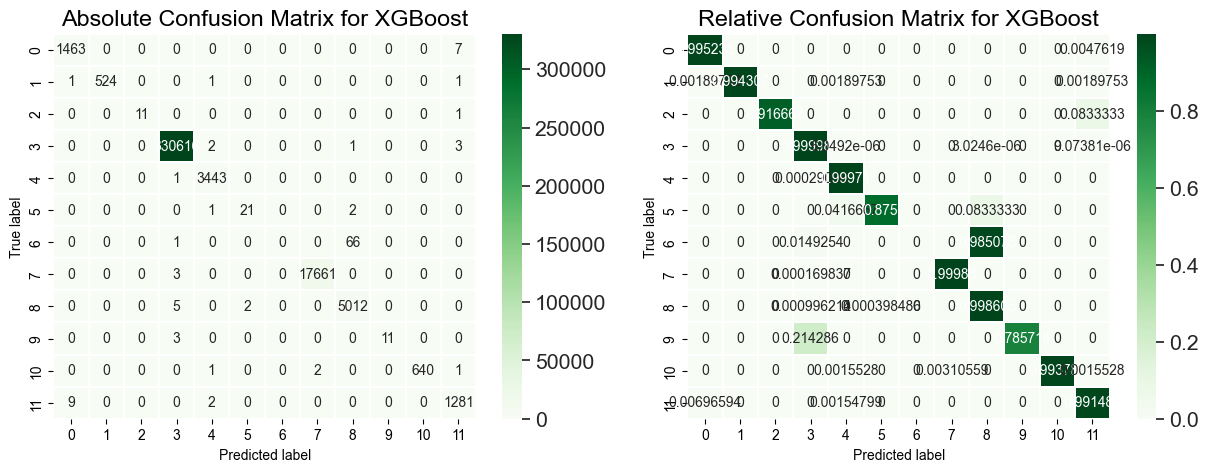

In [21]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [22]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [23]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=25)

24
                       precision    recall  f1-score   support

        SQL_injection     0.9946    0.9946    0.9946      1470
                  XSS     0.9962    0.9981    0.9972       527
             backdoor     1.0000    1.0000    1.0000        12
                clear     1.0000    1.0000    1.0000    330622
                 ddos     0.9985    0.9983    0.9984      3444
                 mitm     1.0000    1.0000    1.0000        24
    os_fingerprinting     0.0000    0.0000    0.0000        67
      password_attack     0.9999    0.9998    0.9998     17664
        port_scanning     0.9866    0.9986    0.9926      5019
           ransomware     1.0000    1.0000    1.0000        14
     uploading_attack     1.0000    0.9984    0.9992       644
vulnerability_scanner     0.9930    0.9923    0.9926      1292

             accuracy                         0.9997    360799
            macro avg     0.9141    0.9150    0.9145    360799
         weighted avg     0.9995    0.9997    0.99

                       precision    recall  f1-score   support

        SQL_injection     0.9886    0.9917    0.9901       959
                  XSS     1.0000    0.9915    0.9957       354
             backdoor     1.0000    0.8571    0.9231         7
                clear     1.0000    1.0000    1.0000    229124
                 ddos     0.9966    0.9991    0.9979      2345
                 mitm     1.0000    0.8500    0.9189        20
    os_fingerprinting     0.0000    0.0000    0.0000        55
      password_attack     0.9996    0.9998    0.9997     12376
        port_scanning     0.9830    0.9991    0.9910      3350
           ransomware     1.0000    1.0000    1.0000        11
     uploading_attack     0.9980    1.0000    0.9990       488
vulnerability_scanner     0.9933    0.9835    0.9884       911

             accuracy                         0.9996    250000
            macro avg     0.9132    0.8893    0.9003    250000
         weighted avg     0.9994    0.9996    0.9995 

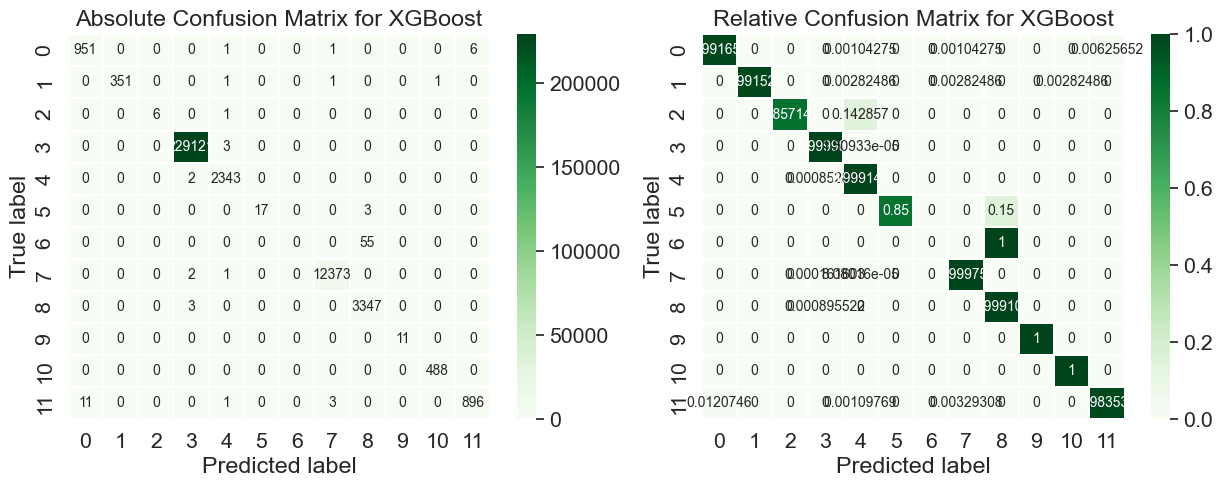

In [24]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [25]:
import csv

problem = "IoT-egde_iiot-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

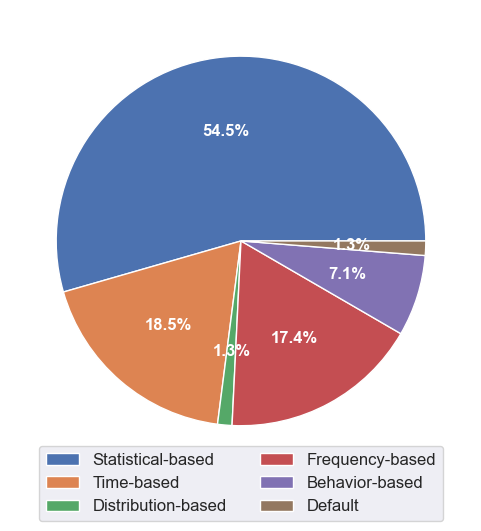

In [26]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [27]:
data

[0.27237788, 0.09259601, 0.0062893615, 0.08705115, 0.03556181, 0.0062893615]

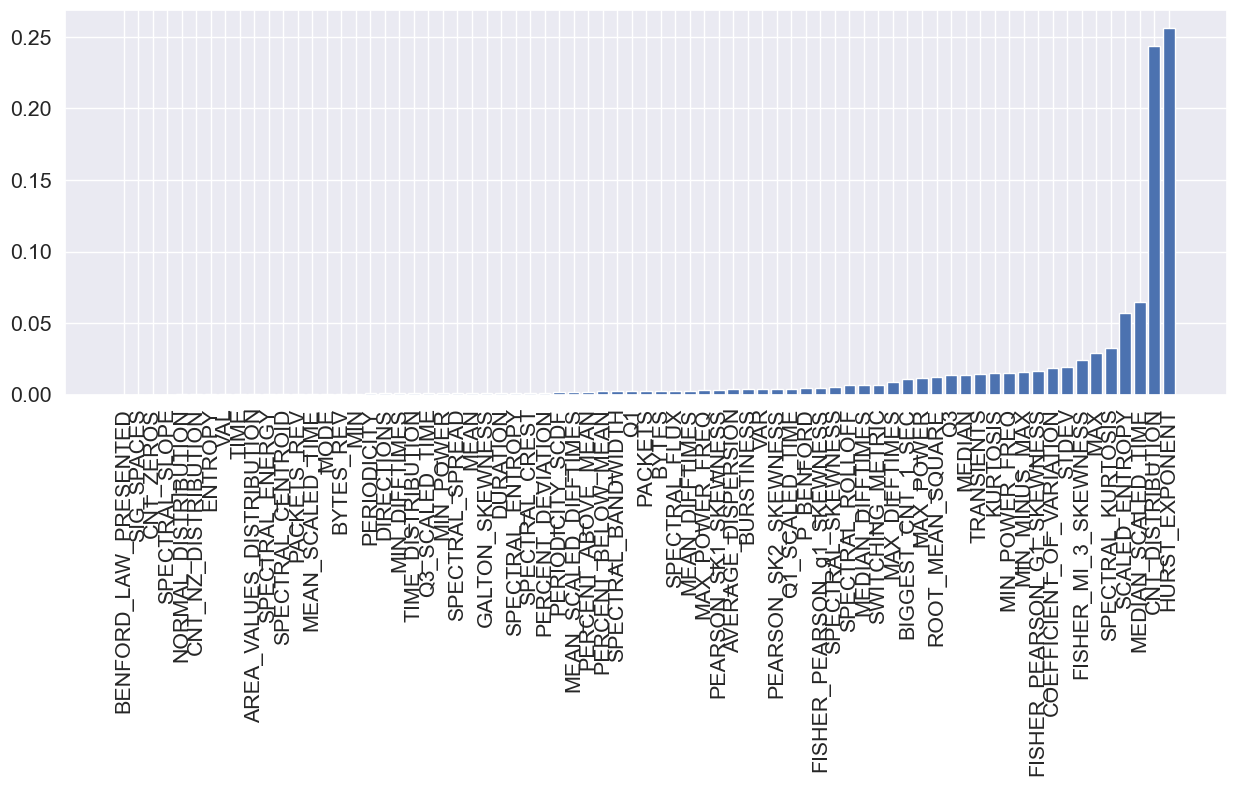

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [29]:
feat_importances

BENFORD_LAW_PRESENTED    0.000000
SIG_SPACES               0.000000
CNT_ZEROS                0.000000
SPECTRAL_SLOPE           0.000121
NORMAL_DISTRIBUTION      0.000163
                           ...   
SPECTRAL_KURTOSIS        0.032690
SCALED_ENTROPY           0.056774
MEDIAN_SCALED_TIME       0.064668
CNT_DISTRIBUTION         0.243945
HURST_EXPONENT           0.256243
Length: 73, dtype: float32

In [30]:
feat_importances.to_dict()

{'BENFORD_LAW_PRESENTED': 0.0,
 'SIG_SPACES': 0.0,
 'CNT_ZEROS': 0.0,
 'SPECTRAL_SLOPE': 0.00012074251571903005,
 'NORMAL_DISTRIBUTION': 0.00016324235184583813,
 'CNT_NZ_DISTRIBUTION': 0.00024175012367777526,
 'ENTROPY': 0.0002736171300057322,
 'VAL': 0.0003326934820506722,
 'TIME': 0.00036072859074920416,
 'AREA_VALUES_DISTRIBUTION': 0.00039601107710041106,
 'SPECTRAL_ENERGY': 0.00041187278111465275,
 'SPECTRAL_CENTROID': 0.0004663839063141495,
 'PACKETS_REV': 0.0005150043871253729,
 'MEAN_SCALED_TIME': 0.0005921369302086532,
 'MODE': 0.0006092541152611375,
 'BYTES_REV': 0.0006735775386914611,
 'MIN': 0.0007675645174458623,
 'PERIODICITY': 0.0008657326688989997,
 'DIRECTIONS': 0.0009083311888389289,
 'MIN_DIFFTIMES': 0.0009127558441832662,
 'TIME_DISTRIBUTION': 0.0009555065771564841,
 'Q3_SCALED_TIME': 0.0010021654888987541,
 'MIN_POWER': 0.0011035213246941566,
 'SPECTRAL_SPREAD': 0.0011128612095490098,
 'MEAN': 0.0011829251889139414,
 'GALTON_SKEWNESS': 0.0011852130992338061,
 'DURAT

# FEATURE SELECTION

In [36]:
def perform_val(selected_features, cycles = 5, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(200000), selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [37]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [22:04<00:00, 13.25s/trial, best loss: -0.777580163242621]
The best hyperparameters are :  

{'colsample_bytree': 0.7618625767539282, 'gamma': 2.438009814547964, 'max_depth': 8.0, 'min_child_weight': 1.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.0022219119523410047}
0.8830880539722589
100%|██████████| 100/100 [12:23<00:00,  7.44s/trial, best loss: -0.8156303962480239]
The best hyperparameters are :  

{'colsample_bytree': 0.1327355775015746, 'gamma': 1.9356003218516116, 'max_depth': 8.0, 'min_child_weight': 2.0, 'n_estimators': 150.0, 'reg_alpha': 0.0, 'reg_lambda': 0.9349674851910655}
0.900595894531585
100%|██████████| 100/100 [11:55<00:00,  7.16s/trial, best loss: -0.890668439525529]
The best hyperparameters are :  

{'colsample_bytree': 0.16419672418124157, 'gamma': 1.9137278562673379, 'max_depth': 6.0, 'min_child_weight': 2.0, 'n_estimators': 50.0, 'reg_alpha': 0.0, 'reg_lambda': 0.0964616995516604}
0.8939066929434856
100%|██████████| 100/10

In [38]:
problem = "IoT-egde_iiot-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])